In [1]:
import torch
import seaborn as sns
from utils import BNN
import matplotlib.pyplot as plt
import numpy as np
import json # for hyper paramameters
from datetime import datetime
# import openturns as ot

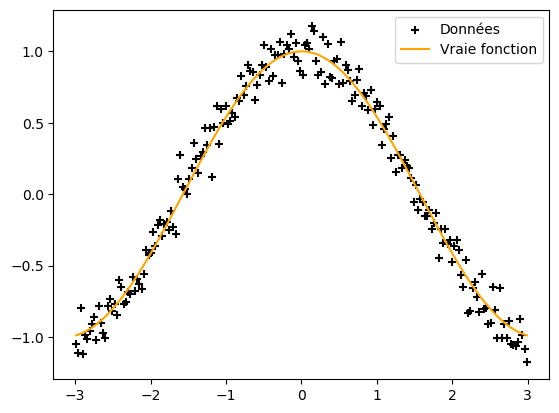

In [2]:
# Definition de la fonction de test
# def f(x, sigma):
#     epsilon = np.random.randn(*x.shape) * sigma
#     return 10*np.sin(2*np.pi*x) + epsilon

def f(x, sigma):
    epsilon = np.random.randn(*x.shape) * sigma
    return np.cos(x) + epsilon


# Paramétrage des données d'entrainements
train_size = 200
noise = 0.1
# Pour sin
# xmin = -0.5
# xmax = 0.5

# Pour cos
xmin = -3
xmax = 3

zoomfig = 2
xminBig = xmin - zoomfig * (xmax - xmin)
xmaxBig = xmax + zoomfig * (xmax - xmin)

XBig = np.linspace(xminBig, xmaxBig, train_size * (2 * zoomfig + 1)).reshape(-1, 1)
X = XBig[train_size * zoomfig : train_size * zoomfig + train_size]
# X = np.linspace(-np.pi, np.pi, train_size).reshape(-1, 1)

y = f(X, sigma=noise)
y_true = f(X, sigma=0.0)


# On affiche tout ça
plt.scatter(X, y, marker='+', label='Données', color = 'k')
plt.plot(X, y_true, label='Vraie fonction', color = 'orange')
# plt.title('Noisy training data and ground truth')
plt.legend()
plt.savefig('plots/CosPlot.png')
plt.show()

In [3]:
XTBig = torch.Tensor(XBig).reshape(XBig.shape)
XT = torch.Tensor(X).reshape(X.shape)
y = torch.Tensor(y).reshape(y.shape)
y_true = torch.Tensor(y_true).reshape(y_true.shape)

In [4]:
f = open("hyperparameters/h11-04-2023_08-47-51.txt")
hyperparameters = json.load(f)
f.close()
thetas = torch.load('thetas/Thetas11-04-2023_08-47-51.pt')

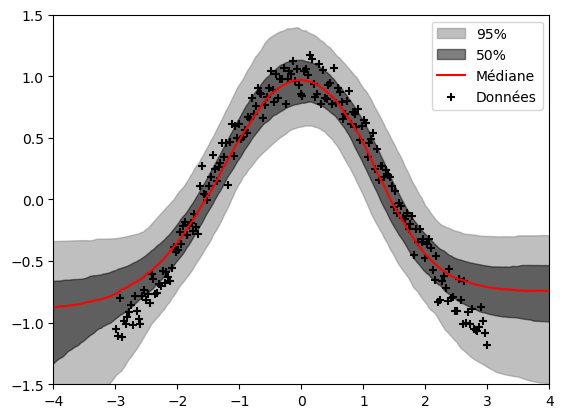

In [5]:
plt.clf()
BNN.plotTubeMedianBig(XT, XTBig, y, thetas,hyperparameters['structure'], 1)
plt.xlim(-4, 4)
plt.ylim(-1.5, 1.5)
plt.savefig('plots/plotCos-{}.png'.format('11-04-2023_08-47-51'))
plt.show()

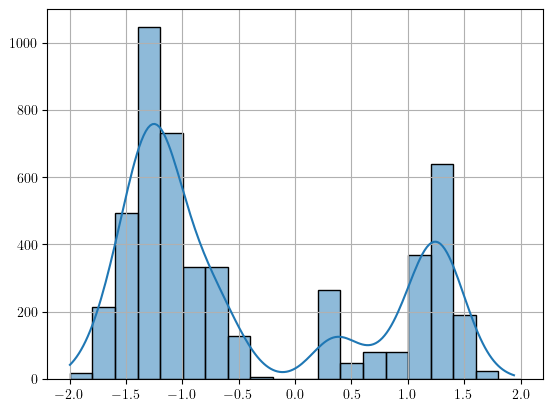

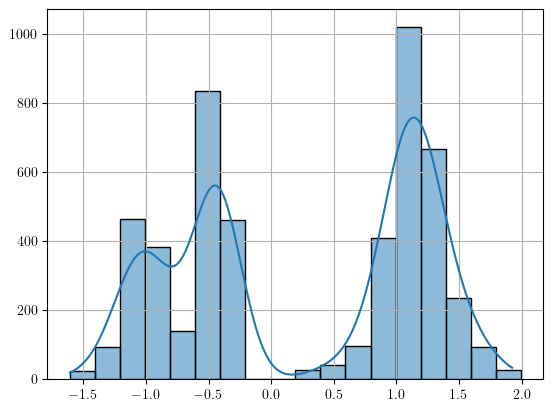

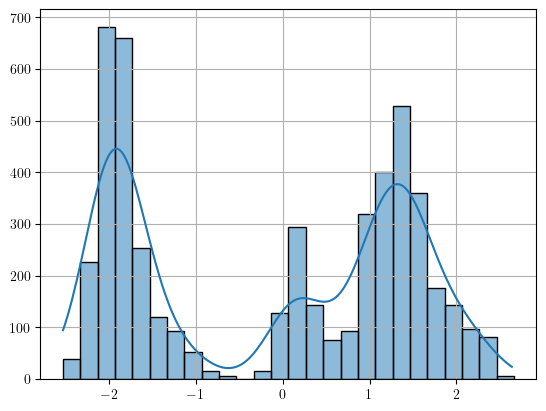

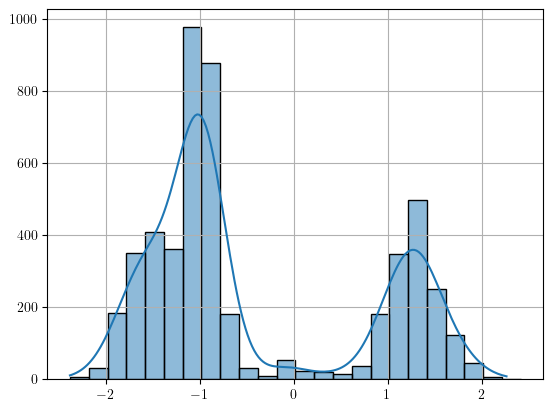

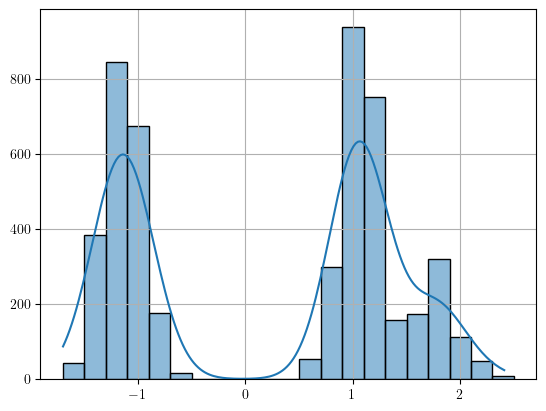

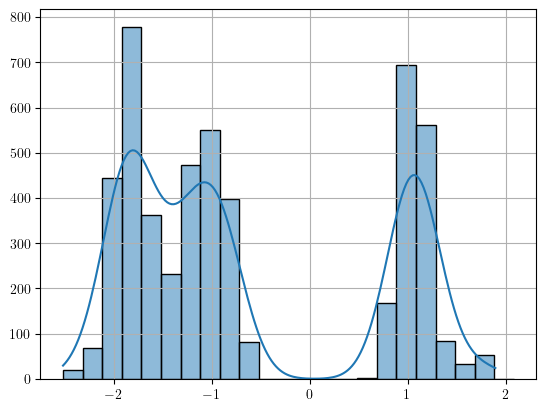

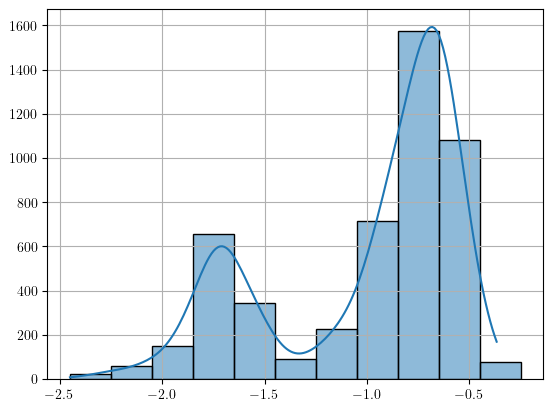

In [13]:

for k in range(thetas.shape[0]) :
    plt.figure()
    # sns.kdeplot(thetas[k,:].detach().numpy(),bw_adjust=.2)
    sns.histplot(thetas[k,:].detach().numpy(), kde = True, binwidth=0.2, fill = True)
    plt.grid('on')
    plt.ylabel(None)
    plt.savefig('plots/plotWeight-{}--{}.png'.format('11-04-2023_08-47-51', k))


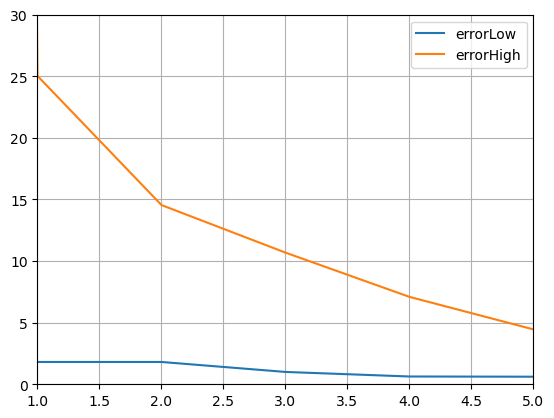

In [7]:
f = open('errors/er11-04-2023_08-47-51.txt')
errors = json.load(f)
f.close()

plt.figure()
plt.plot(np.float32(errors["errorMin"]), label = 'errorLow')
plt.plot(np.float32(errors["errorMax"]), label = 'errorHigh')
plt.legend()
plt.grid("on")
plt.xlim(1, 5)
plt.ylim(0, 30)
plt.savefig('plots/plotErrorCos-{}--{}.png'.format('11-04-2023_08-47-51',2))


In [8]:
plt.rcParams['text.usetex'] = True

<Figure size 640x480 with 0 Axes>

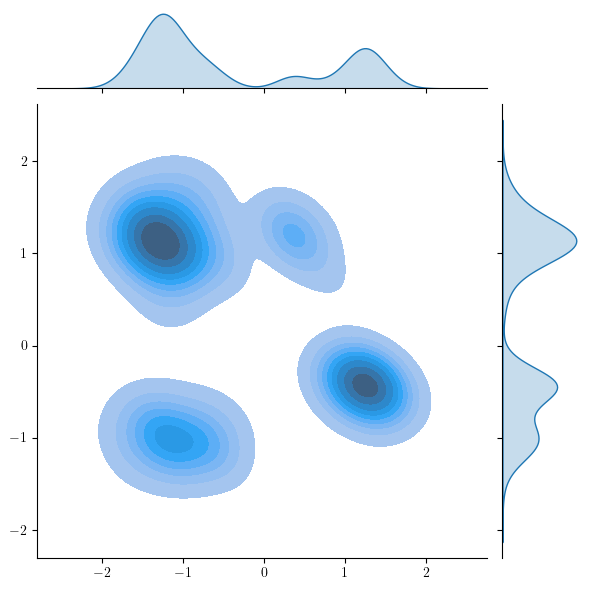

In [9]:

plt.figure()
s = 0
d = 1
sns.jointplot(x = thetas[s,:].detach().numpy(), y = thetas[d,:].detach().numpy(), kind='kde', fill=True)
# sns.histplot(x = thetas[0,:].detach().numpy(), y = thetas[1,:].detach().numpy(),binwidth=(0.2, .2))
plt.savefig('plots/plotWeigthJoint-{}--{}&{}.png'.format('11-04-2023_08-47-51',s,d))
plt.show()

In [10]:
y_hats = torch.concat(
        tuple([BNN.FNN(hyperparameters['structure'], thetas[:, i]).forward(XTBig) for i in range(0, hyperparameters['N'])]), 1)

In [11]:
middle = torch.argmin(torch.abs(XTBig))

<AxesSubplot: ylabel='Count'>

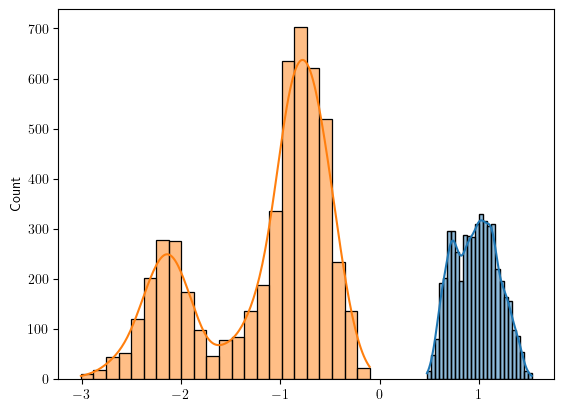

In [12]:
sns.histplot(y_hats[middle,:].detach().numpy(), kde = True)
sns.histplot(y_hats[300,:].detach().numpy(), kde = True)
